In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 1. 데이터 준비

In [3]:
df = pd.read_csv('FISH.csv')

# 농어 데이터만 사용
df = df.loc[df['Species']=='Perch', ['Species','Length2','Weight']]
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


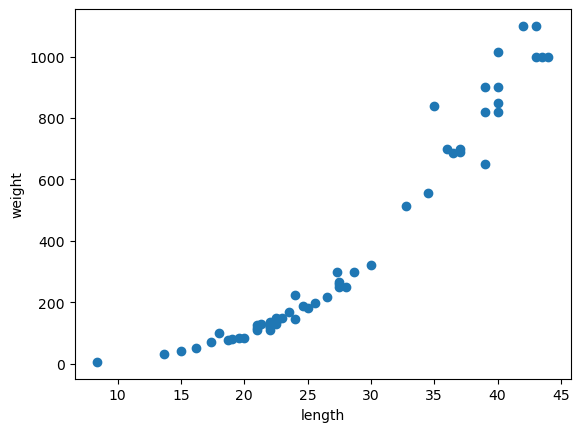

In [4]:
plt.figure()

plt.scatter(df['Length2'], df['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이가 커짐에 따라 무게가 점점 증가하는 경향이 있음.

# 2. 데이터 분할 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['Length2'], 
                                                    df['Weight'],
                                                   test_size=0.25,
                                                   random_state=4)

print(len(x_train), len(y_train), len(x_test), len(y_test))

42 42 14 14


In [6]:
x_train.values

array([32.8, 24.6, 22. , 22. , 23. , 27.5, 22. , 26.5, 22. , 36. , 25. ,
       27.5, 43. , 21.3, 21. , 22.5, 28. , 40. , 42. , 39. , 40. , 44. ,
       15. , 40. , 40. , 22.7,  8.4, 16.2, 37. , 34.5, 30. , 43. , 27.3,
       39. , 35. , 20. , 19.6, 23.5, 36.5, 13.7, 18. , 39. ])

- 컴퓨터에겐 독립변수가 몇개 들어간다는 것을, 2차원 데이터 형식으로 알려줌. 
- 그냥은 이 데이터가 한줄인건지, 아니면 여러줄의 데이터들이 있는건지 모름.
    - 독립변수는 반드시 2차원 배열이어야 함. 

In [7]:
x_train = np.reshape(x_train.values, (-1,1))
x_train

array([[32.8],
       [24.6],
       [22. ],
       [22. ],
       [23. ],
       [27.5],
       [22. ],
       [26.5],
       [22. ],
       [36. ],
       [25. ],
       [27.5],
       [43. ],
       [21.3],
       [21. ],
       [22.5],
       [28. ],
       [40. ],
       [42. ],
       [39. ],
       [40. ],
       [44. ],
       [15. ],
       [40. ],
       [40. ],
       [22.7],
       [ 8.4],
       [16.2],
       [37. ],
       [34.5],
       [30. ],
       [43. ],
       [27.3],
       [39. ],
       [35. ],
       [20. ],
       [19.6],
       [23.5],
       [36.5],
       [13.7],
       [18. ],
       [39. ]])

In [8]:
x_test = np.reshape(x_test.values, (-1,1))

# 3. 모델 훈련

# 선형 회귀 (linear regression)

- 피처를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘 
- 장점
    - 계수들에 대한 해석 간단
    - 학습과 예측 속도 빠름.
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해 가능 
- 단점 
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음.
    - 이상치에 민감 

In [9]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [10]:
# 50센치 농어에 대한 예측
lr.predict([[50]])

array([1204.56473316])

- KNeighborsRegressor: 1010.
- LinearRegression: 1204.56

- 선형회귀 모델이 찾은 가장 적절한 직선은 lr객체에 저장되어 있음.

In [12]:
# 직선의 계수, y절편
lr.coef_, lr.intercept_

(array([36.7977512]), -635.3228268277348)

- 회귀식: y = 36.8 * Length2 + (-635.32)
- coef_와 intercept_ 처럼 머신러닝이 찾은 값을 "모델 파라미터(model parameter)"라고 부름.
- 즉, 머신러닝 알고리즘의 훈련 과정은 "최적의 모델 파라미터를 찾는 것" !
    - 선형회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습** 이라고 하고, 
    - KNN과 같이 모델 파라미터가 없이 훈련 데이터를 저장하는 훈련 방법을 **사례 기반 학습** 이라고 함. 

C:\Users\answl\AppData\Roaming\Python\Python37\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


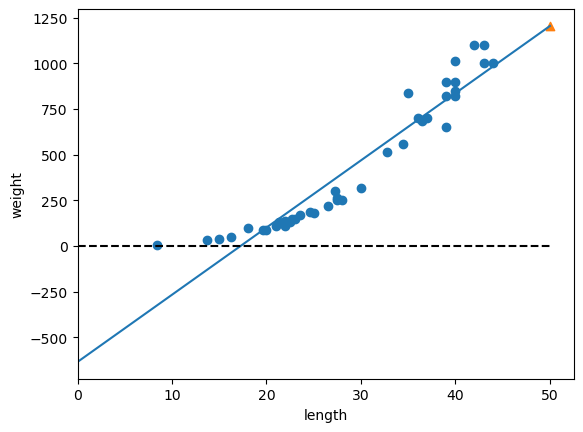

In [13]:
# 훈련 데이터와 회귀선 시각화
plt. figure()

plt.scatter(x_train, y_train)
# plt.plot([x1, x2], [y1, y2]): (x1,y1)에서 (x2,y2)로 향하는 선 그리기 
plt.plot([0,50], [lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.plot([0,50], [0,0],"k--") # k(black)
plt.scatter(50,1205, marker='^')

plt.xlim(0) # x 축 0부터 표현 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 4. 모델 평가

In [14]:
lr.score(x_test, y_test)

0.9316263284554744

In [15]:
pred = lr.predict(x_test)
pred

array([  4.95804405, 192.62657517, 965.37935036, 247.82320197,
       137.42994837, 306.69960388, 420.7726326 , 376.61533116,
        52.79512061, 726.19396756,  63.83444597, 247.82320197,
       137.42994837, 174.22769957])

In [16]:
mae = mean_absolute_error(y_test, pred)
mae

55.4767964020136

In [17]:
mean_absolute_error(pred, y_test)

55.4767964020136

- knnRegressor에 비해, 결정계수 설명력은 더 낮고 평균절대오차가 더 높지만 
- 이것들 만으로는 모델이 좋고 나쁨을 말할 수 없다는 것을 앎.

--> Q. 회귀식도 약간 곡선으로 2차 함수로 만들어 줄 수 있을까? 

# 다항 회귀 (polynomial regression)
- 실제 농어의 무게는 일직선 이라기보단 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측하는 것이 더 적합.
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습 

In [18]:
df['squared'] = df['Length2'] ** 2
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df[['Length2', 'squared']],
                                                   df['Weight'],
                                                   test_size=0.25,
                                                   random_state=4)

In [20]:
x_train.values # 이미 2차원이기 때문에 reshape 과정 필요 없음 

array([[  32.8 , 1075.84],
       [  24.6 ,  605.16],
       [  22.  ,  484.  ],
       [  22.  ,  484.  ],
       [  23.  ,  529.  ],
       [  27.5 ,  756.25],
       [  22.  ,  484.  ],
       [  26.5 ,  702.25],
       [  22.  ,  484.  ],
       [  36.  , 1296.  ],
       [  25.  ,  625.  ],
       [  27.5 ,  756.25],
       [  43.  , 1849.  ],
       [  21.3 ,  453.69],
       [  21.  ,  441.  ],
       [  22.5 ,  506.25],
       [  28.  ,  784.  ],
       [  40.  , 1600.  ],
       [  42.  , 1764.  ],
       [  39.  , 1521.  ],
       [  40.  , 1600.  ],
       [  44.  , 1936.  ],
       [  15.  ,  225.  ],
       [  40.  , 1600.  ],
       [  40.  , 1600.  ],
       [  22.7 ,  515.29],
       [   8.4 ,   70.56],
       [  16.2 ,  262.44],
       [  37.  , 1369.  ],
       [  34.5 , 1190.25],
       [  30.  ,  900.  ],
       [  43.  , 1849.  ],
       [  27.3 ,  745.29],
       [  39.  , 1521.  ],
       [  35.  , 1225.  ],
       [  20.  ,  400.  ],
       [  19.6 ,  384.16],
 

In [21]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [23]:
lr.score(x_test, y_test)

0.9816215605279124

In [24]:
pred = lr.predict(x_test)
pred 

array([  48.88687164,  143.41525556, 1100.25995799,  181.47012205,
        110.02057118,  227.19853592,  330.88597184,  288.38774094,
         67.8664977 ,  706.48881537,   72.74349749,  181.47012205,
        110.02057118,  131.76589609])

In [25]:
mae = mean_absolute_error(y_test, pred)
mae # 55.4767 --> 25.5738

25.57383238519946

In [37]:
lr.predict([[50, 2500]])

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1581.53896459])

In [22]:
lr.coef_, lr.intercept_
# 계수가 2개 나옴. 

(array([-22.78530409,   1.03559602]), 131.8141108364003)

- 회귀식: y = 1.03x^2 + -22.78x + 131.81
    - 여기서 x는 Length2, x제곱은 squared 값

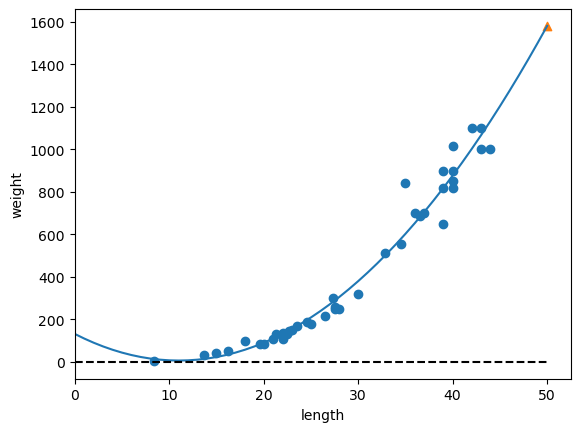

In [40]:
# 훈련 데이터와 회귀선 시각화
plt. figure()

plt.scatter(x_train['Length2'], y_train)

x = np.array(range(0,51))
# 이것과 같음. x = np.arange(0,51)
plt.plot(x, lr.coef_[1]*x**2 + lr.coef_[0]*x + lr.intercept_)

plt.plot([0,50], [0,0],"k--") # k(black)
plt.scatter(50,1581.54, marker='^')

plt.xlim(0) # x 축 0부터 표현 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()